# Aula 10 - O Que É Pré-Processamento de Dados

## Principais Técnicas de Pré-Processamento de Dados

- Detecção de Anomalias
- Discretização ou Binarização
- Normalização
- Standardization (Padronização)

## Modelgem de Dados

- Bag of Words

## Detecção de Anomalias

- Detectar anomalias nos conjuntos de dados é de extrema importância para o sucesso de qualquer projeto de Data Science
- Anomalias nada mais são que valores discrepantes (outliers) que, normalmente, não correspondem à realidade
- Principais motivos que resultam em anomalias/outliers:
  - Erros de coleta e armazenamento de dados
  - Erros durante conversões e transformações de dados
  - Etc.

## Discretização

- Discretização de dados é um técnica que consiste em transformar valores numéricos em valores nominais ou discretos que possam representar melhor os dados
- Através da Discretização é possível utilizar algoritmos que não trabalham com valores numéricos já que os dados são transformados em valores discretos
- No exemplo abaixo, os valores numéricos de altura foram tranformados em classes (bins) categóricas (ordinais, mas poderia serem nominais também)

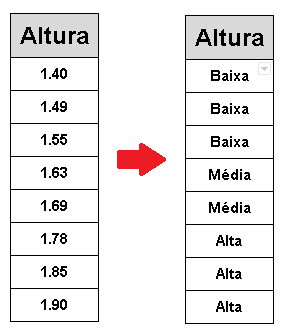

## Normalização

- Normalizar dados de forma bem simples significa aplicar uma mesma norma ao dados
- Um passo importante antes de executar algoritmos de Machine Learning

## Standardization (Padronização)

- Standartization ou padronização é a re-escala dos dados numéricos dentro de uma faixa baseado em alguns critérios
- Essa técnica, na prática, ignora a forma da distribuição e transforma o dado para forma com média próxima de zero e um desvio padrão próximo a um, ou seja, assume que não temos valores discrepantes nos dados
- Técnica praticamente obrigatória para algoritmos de Clusterização e para aqueles associados à distância

## Bag of Words (Saco de Dados)

- É um tipo de modelagem de dados
- Representação simples onde as palavras em uma sentença são representadas através de um vetor
- Exemplo: com as sentenças abaixo:
  - Este celular é um produto excelente
  - O celular do João é um iphone
- Pega cada palavra de uma frase e transforma em um atributo (tipo o get dummies)
  - = 1 --> esse atributo (palavra) está está na frase
  - = 0 --> esse atributo (palavra) não está está na frase
- Constroi-se uma tabela com essas variáveis, cujos valores são 0 ou 1



### Variação do método Bag of Words - N-Gram

- Cada atributo passa a ser mais de uma palavra (N é o número de palavras por atributo) ao invés de uma
- Os valores continuam sendo 0 (ausente na frase) e 1 (presente na frase)

# Aula 11 - Detecção e Tratamento de Anomalias

## Criação de um Dataset para Simulação de Anomalias

In [0]:
# Importação da biblioteca Numpy
import numpy as np

In [3]:
# Criação de um array a partir de uma lista numérica
dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

dados = np.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


## Visualização das Anomalias via Boxplot

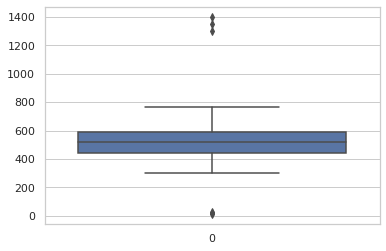

In [17]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados); # O ";" serve para não imprimir as mensagens

## Cálculo da Média e Desvio Padrão

In [11]:
# Cálculo da média dos valores pertencentes ao array
media = np.mean (dados,axis=0) # axis = 0 (default) --> tira a média da linha de valores
media                          # axis = 1 --> tira a média da coluna de valores
                               # Entretanto, o array é formado por 1 linha, apenas

530.3673469387755

In [9]:
# Cálculo do DP dos valores pertencentes ao array
std = np.std(dados,axis=0)
std

192.51166875607043

## Cálculo das Fronteiras dos Outliers

- No caso, utilizaremos a seguinte definição de outliers (valores muito abaixo/acima da média):
  - Valores > media + 2DP
  - Valores < media - 2DP

### Cálculo da Fronteira Inferior

- Valores < media - 2DP

In [12]:
lim_inf = media - (2 * std)
lim_inf

145.34400942663467

### Cálculo da Fronteira Superior

- Valores > media + 2DP

In [13]:
lim_sup = media + (2 * std)
lim_sup

915.3906844509164

## Listagem de Outliers

- Aqui, descobriremos os outliers/anomalias INFERIORES e SUPERIORES

### Listagem de Anomalias Inferiores

- Valores menores que **media - 2DP**

In [15]:
for x in dados:
  if x < (media - (2*std)):
    print (x, end=',')


10,20,30,

### Listagem de Anomalias Superiores

- Valores maiores que **media + 2DP**

In [16]:
for x in dados:
  if x > (media + (2*std)):
    print (x,end=',')

1300,1350,1400,

## Remoção de Anomalias/Outliers Inferiores e Superiores

- Remoção de valores menores que media - 2DP
- Remoção de valores maiores que media + 2DP

### Remoção de Anomalias Inferiores

- Remoção de valores menores que media - 2DP

In [19]:
# Atualização dos dados com a exclusão dos outliers inferiores
dados = [x for x in dados if (x > media - (2*std))]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


### Remoção de Anomalias Superiores

- Remoção de valores maiores que media + 2DP

In [20]:
# Atualização dos dados com a exclusão dos outliers superiores
dados = [x for x in dados if (x < media + (2*std))]
print (dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


## Visualização dos Dados Após a Remoção das Anomalias/Outliers

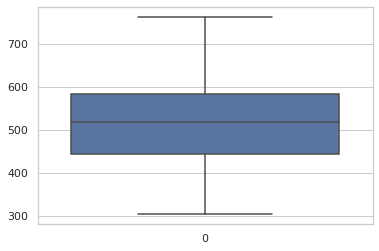

In [21]:
# Plotagem do Boxplot. Note que os valores não apresentam mais anomalias
sns.boxplot(data=dados);

# Aula 12 - Aplicando Discretização aos Dados

- O objetivo é tranformar dados **numéricos** em dados categóricos/qualitativos, que podem ser nominais ou ordinais
- No caso, dados numéricos serão transformados em dados categóricos ordinais

## Criação do Conjunto de Dados

In [0]:
# Importação do Pandas
import pandas as pd

In [0]:
# Criação da lista com informações de altura
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

## Aplicando Discretização nos Dados de Altura

- **var = pd.qcut (var , n , labels = [ 'label1' , 'label2' , ... ] )**
- Nessa situação, iremos discretizar os dados em "n" = **3 bins/classes** de **tamanhos iguais**
- As classes serão chamadas de "Baixo", "Médio" e "Alto". Essas seriam as "labels"

In [24]:
altura = pd.qcut(altura,3,labels=['Baixo','Medio','Alto'])
print (altura)

# Observe que na saída são retornadas as classes e a ordem delas

[Baixo, Baixo, Medio, Medio, Alto, Alto]
Categories (3, object): [Baixo < Medio < Alto]


### Contagem de Valores Únicos em Cada Classe

In [25]:
altura.value_counts()

Baixo    2
Medio    2
Alto     2
dtype: int64

## Importando Nova Base de Dados

In [26]:
path = '/content/drive/My Drive/Colab Notebooks/Data Science do ZERO/7 - Estatística Aplicada e Pré-Processamento dos Dados/Materiais Disponibilizados/kc_house_data.csv'
df = pd.read_csv (path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Contagem de Valores Únicos de Número de Andares

In [27]:
df['floors'].value_counts ()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

## Discretização dos Dados de Número de Andares

- **df [ 'new_col' ] = pd.cut (df [ 'col' ] , n , labels = [ 'label1' , 'label2' , ... , 'labeln' ] )**
- Discretiza a coluna de um df (df [ 'col' ] ) em um número "n" de classes/bins denominadas "labels"

In [0]:
# Criação de uma nova coluna com os dados de número de quartos discretizados
df['floor_labels'] = pd.cut(df['floors'],5,
                            labels = ['Muito-Pequeno','Pequeno','Medio',
                                      'Grande','Muito-Grande'])

In [29]:
# Visualização da nova coluna discretizada criada
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floor_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


### Impressão de Valores Únicos da Nova Coluna Discretizada

- **df [ 'col' ].unique ( )**

In [31]:
df['floor_labels'].unique ()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

### Contagem de Valores Únicos da Coluna Discretizada Criada

- **df [ 'col' ].value_counts ( )**

In [30]:
df['floor_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floor_labels, dtype: int64

# Aula 13 - Aplicando Normalização aos Dados

- O objetivo da normalização é transformar os dados, de modo a deixá-los o mais próximo possível da **forma normal**, i.e., valores cada vez **mais próximos da média**
- Aplicando a normalização dos dados, faremos com que os dados sejam transformados em uma distribuição normal e, assim, os dados estarão mais próximos da média
- Essa normalização para aproximar a distribuição dos dados à uma distribuição normal, tem o intuito de preparar os dados para algoritmos de ML que assumem que a a distribuição dos dados é NORMAL
- Principais tipos de Norma:
    - L0
    - L1 (Manhattan Distance/Norma Taxicab)
    - L2 (Norma Euclidiana)
    - L-Infinita

## Principais Tipos de Normas

### Norma L0

- É dada pela quantidade de elementos não nulos de um vetor
- A norma L0 do vetor (0,1,0,0,0,5) é 2, pois existem apenas dois elementos não nulos no vetor
- Não é uma norma stricto sensu
- Exemplo:
  - Temos dois vetores, com informações de: (1) Usuário e (2) Senha
  - Se norma L0 = 0 --> o login foi realizado com sucesso
  - Se norma L0 = 1 --> ou o usuário ou a senha está incorreto, mas não ambos e não se sabe qual
  - Se norma L0 = 2 --> ambos usuário e senha estão incorretos

### Norma L1

- Também conhecida como "taxicab Norm" ou "Manhattan Distance"
- É a soma dos módulos dos elementos de um vetor
- Quando aplicada para medir distâncias entre vetores, consiste na soma dos módulos das diferenças entre componentes dos vetores
- Todos os elementos do vetor recebem o mesmo peso
- Exemplo: Imagine o vetor v = (3,4)
  - ||v||1 = |3| + |4| = 7

![alt text](https://miro.medium.com/max/600/0*1kmU2e3eDsPGJjvR.jpg)

- No exemplo acima, a norma L1 é a distância de viagem entre a origem (0,0) e o destino final (3,4). Não é uma distância direta, mas, na verdade, é como se um taxi tivesse que percorrer uma distância contornando quarteirões de uma cidade e não uma distância em linha reta


### Norma L2

- Também chamada de "Norma Euclidiana"
- É basicamente uma aplicação do teorema de pitágoras que calcula a magnitude real de um vetor
- Ao contrário da norma L1, a norma L2 é a **menor distância** (distância direta) entre um ponto e outro no espaço:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4d2562bd8e6df0c2625fd9c0e0c09ee9b932785d)

- Como, no cálculo dessa norma (L2), os elementos do valor são elevados ao quadrado, valores extremos (que podem ou não ser outliers) recebem um peso maior, o que pode gerar uma assimetria (skewness)
- Ainda utilizando o exemplo anterior dos vetores (0,0), ou seja, a origem, e o vetor (3,4), ou seja, o destino, teríamos a seguinte situação:

![alt text](https://miro.medium.com/max/1078/1*qGQqHj9t1gyYH20YUOybeg.png)

![alt text](https://miro.medium.com/max/600/0*HTlIui8sHP8pIHBW.jpg)

### Norma L-Infinita

- Ela considera que apenas o maior elemento do vetor apresenta um efeito
- A Normal L-Infinita é dada pelo módulo do maior elemento de um vetor
- Exemplo 1: Dado um vetor v = (1,2,-6,4,-5), a Norma L-Infinita é 6
- Exemplo 2: Em uma situação em que um vetor é constituído pelos custos de uma obra, se minimizamos a Norma L-Infinita, nós reduzimos o custo da obra

## Exemplo de Normalização com Norma L2

### Importação das Bibliotecas

In [0]:
import warnings
warnings.filterwarnings('ignore') # Importação de biblioteca para ignorar avisos
from sklearn.preprocessing import Normalizer # Importação do método de normalização
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Criando Dados para Exemplo

In [34]:
# Criando dados a partir de uma lista aninhada
data = [[-1, 2],[0.5, 6],[0, 10],[1, 18]]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


### Cálculo da Média Aritmética

In [41]:
# Tranformação de lista aninhada para numpy array
data = np.array(data)
# Cálculo da média aritmética
print (np.mean(data))

# OBS.: não seria necessário tranformar a lista aninhada em numpy array para
# tirar a média. Entretanto, isso já é necessário para plotar o histograma abaixo

4.5625


### Visualização Prévia da Distribuição dos Dados

In [42]:
# Note que o numpy array apresenta 2 dimensões
data

array([[-1. ,  2. ],
       [ 0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

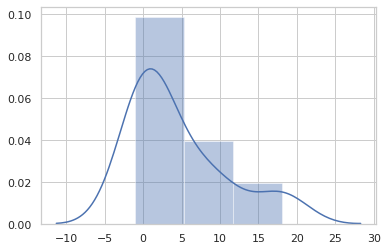

In [43]:
# Plotagem de histograma com modelo de distribuição de frequências
sns.distplot(data.reshape(-1))
plt.show()

# O método "reshape(-1)" tranforma o numpy array para um numpy array de apenas
# 1 dimensão

# Note que os dados apresentam uma ASSIMETRIA POSITIVA

### Aplicação da Normalização sobre os Dados

1. Inicialmente instancia-se o objeto chamado de "norma":
                              norma = Normalizer(norm = 'l2'/'l1'/'max' ).fit (data)

2. Em seguida, aplica-se a normalização L2 sobre os dados:
                              normalized_data = norma.transform(data)


- OBS:
    - data --> dados a serem normalizados
    - norma --> nome do objeto instanciado para ser normalizado
    - normalized_data --> dados normalizados
    - Por default, a norma (norm) padrão é 'l2'

In [0]:
# Instanciamento do objeto "norma":
norma = Normalizer().fit(data)

In [48]:
# Normalização (L2) dos dados:
dados_normalizados = norma.transform(data,)
print(dados_normalizados)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


### Tranformando o Numpy Array Normalizado para um Numpy Array Normalizado de 1D

In [50]:
# Tranformação do Numpy Array Normalizado de 2D para um Numpy Array Normalizado
# de 1D
dados_normalizados = dados_normalizados.reshape(-1)
dados_normalizados

array([-0.4472136 ,  0.89442719,  0.08304548,  0.99654576,  0.        ,
        1.        ,  0.05547002,  0.99846035])

### Cálculo da Média Aritmética dos Dados Normalizados

In [51]:
# Cálculo da média aritmética para os dados normalizados
np.mean(dados_normalizados)

0.4475919008033141

### Visualização dos Dados Normalizados pela Norma L2

- Agora, note que a distribuição dos dados normalizados se assemelha mais à distribuição normal

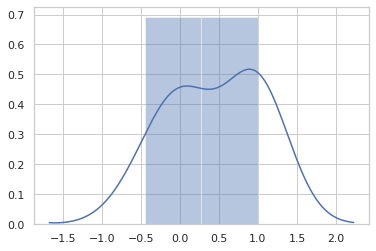

In [52]:
# Plotagem do histograma com modelo de distribuição de frequências para os dados
# normalizados
sns.distplot(dados_normalizados)
plt.show()

# Aula 14 - Standardization - Técnica MinMaxScaler

- A Padronização, quando aplicada, realiza uma "re-escala" dos dados, ou seja, ela essa técnica padroniza os dados, de modo que eles fiquem na mesma faixa/escala de valores
- Diferentemente da normalização, a padronização NÃO altera a distribuição dos dados. Ela, simplesmente, realiza uma re-escala dos dados
- Ela é de suma importância para tratar dados que serão submetidos a algoritmos baseados em distância. Isso é importante, pois, nesse caso, os valores que se encontram em m, km e cm, por exemplo, devem ser re-escalados para um mesmo intervalo/escala/unidade
- Uma técnica bastante utilizada é a **`minmax`**, em que todos os dados são re-escalados para valores entre 0 e 1. Nessa situação, o 0 é o menor valor possível, enquanto o 1 é o maior valor possível

## Principais Técnicas de Stadardization

- **MinMaxScaler** --> aplica uma re-escala a um dataset, de tal maneira que os valores re-escalados passam a se encontrar entre 0 e 1

- StandardScaler --> aplica uma re-escala a um dataset, de tal maneira que a escala dos dados re-escalados é mais fiel aos dados originais do que no caso da técnica anterior

- Em ambas as técnicas, não há alteração na distribuição de frequências dos dados originais

## Criando um Dataset com números aleatoriamente selecionados com Distribuição Normal

                                          dataset = np.random.normal(size = n)

- Esse método seleciona um número "n" de valores aleatórios que apresentam uma distribuição normal

In [78]:
data = np.random.normal(size = 50)
print(data)

[-0.07276493  0.42618029 -1.49870859  1.43660099  0.6586437   0.97532044
  1.03282354  0.83329658 -0.62248026  0.17726837 -1.15106271  0.35671958
 -0.53400687  1.43822323  0.46499316  1.21949679 -0.84300273 -0.23846873
  0.49888694  1.61924325 -0.83601182 -0.67685064  0.92759623  1.32534686
 -1.19817394  1.46173689 -0.8646966   0.2966544   1.03178324 -1.17608578
  0.94445339  1.59980705 -0.11621612  1.13159655 -0.03254312 -0.86982779
  0.59496792 -1.56162874  0.49913032 -0.40711924  0.75006827 -1.00915438
  2.21464758 -0.62022372  0.4376373  -1.18761436  1.18568593 -1.59199707
  1.83338492 -0.46175684]


## Tranformação de um Numpy Array em um Numpy Array de 1D

                                      dataset = dataset.reshape(-1,1)

- Transforma um Numpy Array em um Numpy Array de 1D

- OBS.: esse método deve deve receber os parâmetros (-1,1), caso contrário dá um erro na etapa de instanciação do objeto "scaler"

In [79]:
data = np.array(data)
data = data.reshape(-1,1)
data

array([[-0.07276493],
       [ 0.42618029],
       [-1.49870859],
       [ 1.43660099],
       [ 0.6586437 ],
       [ 0.97532044],
       [ 1.03282354],
       [ 0.83329658],
       [-0.62248026],
       [ 0.17726837],
       [-1.15106271],
       [ 0.35671958],
       [-0.53400687],
       [ 1.43822323],
       [ 0.46499316],
       [ 1.21949679],
       [-0.84300273],
       [-0.23846873],
       [ 0.49888694],
       [ 1.61924325],
       [-0.83601182],
       [-0.67685064],
       [ 0.92759623],
       [ 1.32534686],
       [-1.19817394],
       [ 1.46173689],
       [-0.8646966 ],
       [ 0.2966544 ],
       [ 1.03178324],
       [-1.17608578],
       [ 0.94445339],
       [ 1.59980705],
       [-0.11621612],
       [ 1.13159655],
       [-0.03254312],
       [-0.86982779],
       [ 0.59496792],
       [-1.56162874],
       [ 0.49913032],
       [-0.40711924],
       [ 0.75006827],
       [-1.00915438],
       [ 2.21464758],
       [-0.62022372],
       [ 0.4376373 ],
       [-1

## Visualização dos Dados

- Plotagem de histograma com o modelo de distribuição de frequências

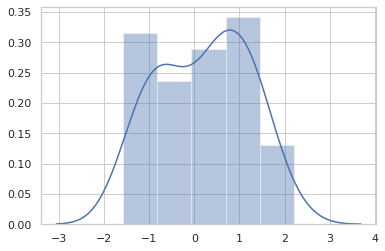

In [80]:
sns.distplot(data)
plt.show()

## Verificação de Máximo e Mínimo do Dataset

- Note que os valores estão entre -1 e 2

In [81]:
# Cálculo dos valores máximo e mínimo do dataset não re-escalado
minimo = data.min()
maximo = data.max()
# Imprimindo min e max
print("Valor Mínimo = {}".format(minimo))
print("Valor Máximo = {}".format(maximo))

Valor Mínimo = -1.5919970666687515
Valor Máximo = 2.2146475838326243


## Importação de Bibliotecas

In [0]:
from sklearn.preprocessing import MinMaxScaler

## Instanciação do Objeto "Scaler"

                                  scaler = MinMaxScaler( ).fit(dataset)

- Atribui-se o método "MinMaxScaler" a um objeto "scaler" e o "treina" (fit) com o dataset

In [0]:
# Instanciação do objeto "scaler"
scaler = MinMaxScaler().fit(data)

## Aplicação da Re-escala ao Dataset - MinMaxScaler

                                dataset_scaled = scaler.transform(dataset)

In [84]:
# Aplicação da re-escala sobre os dados
data_scaled = scaler.transform(data)
print(data_scaled)

# OBS.: note que os valores re-escalados encontram-se entre 0 e 1

[[0.39910007]
 [0.53017225]
 [0.02450675]
 [0.79560829]
 [0.59124005]
 [0.67443057]
 [0.68953655]
 [0.6371211 ]
 [0.25469065]
 [0.46478345]
 [0.11583281]
 [0.51192502]
 [0.27793248]
 [0.79603445]
 [0.54036833]
 [0.73857534]
 [0.19675972]
 [0.35556992]
 [0.54927218]
 [0.84358815]
 [0.19859622]
 [0.24040763]
 [0.66189349]
 [0.766382  ]
 [0.10345676]
 [0.80221146]
 [0.19106077]
 [0.49614599]
 [0.68926326]
 [0.10925929]
 [0.66632184]
 [0.83848229]
 [0.3876855 ]
 [0.71548407]
 [0.40966628]
 [0.18971282]
 [0.57451251]
 [0.00797772]
 [0.54933611]
 [0.31126568]
 [0.61525715]
 [0.15311192]
 [1.        ]
 [0.25528344]
 [0.53318199]
 [0.10623075]
 [0.72969327]
 [0.        ]
 [0.89984285]
 [0.29691246]]


## Alteração do Numpy Array para um Numpy Array de 1D

                                      data_scaled = data_scaled.reshape (-1,1)

In [0]:
data_scaled = data_scaled.reshape(-1,1)

## Mínimo e Máximo do Dataset após a Aplicação da Re-escala

- Note que os valores, agora, situam-se entre 0 e 1

In [86]:
# Cálculo dos valores máximo e mínimo do dataset re-escalado
minimo = data_scaled.min()
maximo = data_scaled.max()
# Imprimindo min e max
print("Valor Mínimo Re-escalado = {}".format(minimo))
print("Valor Máximo Re-escalado = {}".format(maximo))

Valor Mínimo Re-escalado = 0.0
Valor Máximo Re-escalado = 1.0


## Visualização dos Dados Re-escalados

- Note que a técnica "MinMaxScaler" é responsável por **re-escalar** um dataset, de forma que seus valores estejam entre 0 e 1
- Note que NÃO HOUVE UMA MUDANÇA NA FORMA DA DISTRIBUIÇÃO DE FREQUÊNCIAS

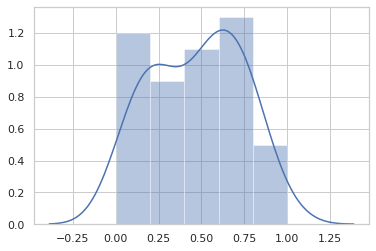

In [87]:
# Plotagem de histograma e modelo de distribuição de frequências dos dados
# re-escalados
sns.distplot(data_scaled)
plt.show()

# Aula 15 - Standardization - Técnica StandardScaler

- Padroniza a escala dos dados sem interferir na sua forma

- Mantém a escala dos dados mais fiel que a técnica "MinMaxScale"

## Criação de um Dataset de Distribuição Normal

In [93]:
# Criação de um dataset com distribuição normal
dataset = np.random.normal(size = 50)
print(dataset)

[-0.21599712  0.45283812 -0.77664949  0.22770964 -0.26378226 -0.79610144
  0.06573627  0.92812494  1.39365851  1.48770942  2.64116959 -0.27044037
 -0.69590436 -0.64577867  0.04984806  0.60007934 -1.09513435  0.83195936
 -1.19805159  0.92737411  2.11969414  0.40869547  1.32814614 -2.02716127
 -0.75045893  0.0310526  -2.04382592  2.30029625  0.81407429  0.40741443
  0.61086572 -0.12132849  0.38786689  0.24128887 -0.68818464 -0.49159991
  0.31252626  0.06158728  1.02562311  2.0508513   0.43618317  1.82281022
 -0.06432648  1.48300859 -1.5314685   0.80266888 -0.24942501 -0.10400787
  0.42483335 -0.14631924]


## Transformação do Dataset Criado para um Numpy Array de 1D

In [0]:
# Transformação do dataset para um numpy array
dataset = np.array (dataset)

In [0]:
# Transformação em um numpy array de apenas 1D
dataset = dataset.reshape(-1,1)

## Visualização Prévia dos Dados

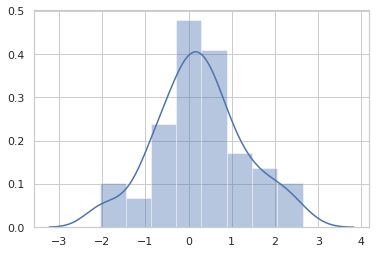

In [96]:
# Plotagem dos histogramas e do modelo de distribuição de frequências
sns.distplot(dataset)
plt.show()

## Cálculo de Máximo e Mínimo do Dataset Não Re-escalado

In [97]:
# Cálculo dos valores máximo e mínimo do dataset não re-escalado
minimo = dataset.min()
maximo = dataset.max()
# Imprimindo min e max
print("Valor Mínimo = {}".format(minimo))
print("Valor Máximo = {}".format(maximo))

Valor Mínimo = -2.0438259244103802
Valor Máximo = 2.6411695948182445


## Importação das Bibliotecas

In [0]:
from sklearn.preprocessing import StandardScaler

## Instanciação do Objeto "stdscaler"

- Atribuição do método "StandardScaler" a um objeto chamado "stdscaler"
- Em seguida ele é "alimentado" pelos dados

                           stdscaler = StandardScaler( ).fit(dataset)

In [0]:
stdscaler = StandardScaler().fit(dataset)

## Aplicação da Re-escala do Dataset - StandardScaler

In [101]:
dataset_scaled = stdscaler.transform(dataset)
print(dataset_scaled)
print(type(dataset_scaled)) # Já é um np array

[[-0.45238448]
 [ 0.19691985]
 [-0.99666503]
 [-0.02163456]
 [-0.49877423]
 [-1.01554895]
 [-0.17887809]
 [ 0.65832764]
 [ 1.11026699]
 [ 1.20157149]
 [ 2.32134904]
 [-0.50523792]
 [-0.91827777]
 [-0.86961582]
 [-0.19430234]
 [ 0.33986143]
 [-1.3058497 ]
 [ 0.56497024]
 [-1.40576161]
 [ 0.65759874]
 [ 1.81510139]
 [ 0.15406623]
 [ 1.04666768]
 [-2.21066015]
 [-0.97123927]
 [-0.21254895]
 [-2.22683817]
 [ 1.99042967]
 [ 0.54760743]
 [ 0.15282259]
 [ 0.35033283]
 [-0.3604803 ]
 [ 0.13384587]
 [-0.00845187]
 [-0.91078347]
 [-0.71993928]
 [ 0.06070529]
 [-0.18290593]
 [ 0.75297873]
 [ 1.74826885]
 [ 0.18075125]
 [ 1.52688689]
 [-0.30514283]
 [ 1.19700793]
 [-1.72944229]
 [ 0.53653507]
 [-0.48483623]
 [-0.34366547]
 [ 0.16973286]
 [-0.38474129]]
<class 'numpy.ndarray'>


## Alteração do Array Re-escalado para um Numpy Array 1D

In [0]:
dataset_scaled = dataset_scaled.reshape(-1,1)

## Mínimo e Máximo do Dataset após a Aplicação da Re-escala

- Note que os valores máximo e mínimo pouco mudaram após a aplicação da re-escala
- Portanto, a técnica "StandardScaler", além de não alterar a distribuição de frequências do dataset, ela busca manter a escala/intervalo original dos dados e consegue fazer isso melhor do que a técnica "MinMaxScaler"

In [103]:
# Cálculo dos valores máximo e mínimo do dataset não re-escalado
minimo = dataset_scaled.min()
maximo = dataset_scaled.max()
# Imprimindo min e max
print("Valor Mínimo Re-escalado = {}".format(minimo))
print("Valor Máximo Re-escalado = {}".format(maximo))

Valor Mínimo Re-escalado = -2.2268381722588795
Valor Máximo Re-escalado = 2.321349043630641


## Visualização dos Dados Re-escalados

- Note que a distribuição de frequências do dataset não foi alterada

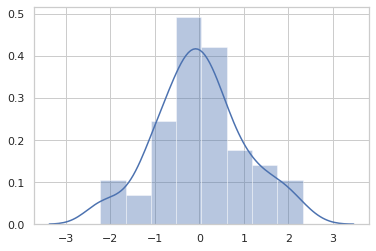

In [104]:
sns.distplot(dataset_scaled)
plt.show()

# Resumo - Técnicas de Pré-processamento de Dados

**Detecção de Anomalias**
- Consiste na identificação de anomalias/outliers e tratamento desses
- As anomalias/outliers podem ser descartados (conforme mostrado), ou ainda, substituídos por algum valor (média dos valores, por exemplo)
- Algumas definições de outlier:
  - media - 2DP > outliers > media + 2DP
  - Q1 - 1.5(IQR) > outliers > Q3 + 1.5(IQR)

**Discretização**
- Consiste na transformação de variáveis contínuas em variáveis discretas (nominais ou ordinais), cujos valores representam classes/bins

**Normalização**
- Tranforma a distribuição de um dataset, de modo que, se aplicada a norma L2 (Euclidiana), o resultado é aproximar os dados de uma distribuição normal
- É fundamental a aplicação dessa técnica para a preparação de dados que serão submetidos a algoritmos de ML que assumem que os dados tenham uma distribuição normal
- Principal técnica --> Normalizer

**Standardização**
- Não tranforma a forma da distribuição de um dataset, como a normalização
- Realiza uma re-escala de um dataset para um determinado intervalo:
    - MinMaxScaler --> re-escala dos dados para um intervalo entre 0 e 1
    - StandardScaler --> re-escala dos dados para um intervalo semelhante ao original
- É uma técnica praticamente obigatória para a preparação de dados que serão submetidos a algoritmos de ML baseados em distância